# Google Colab 한글 폰트 설치

In [11]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


- 테스트

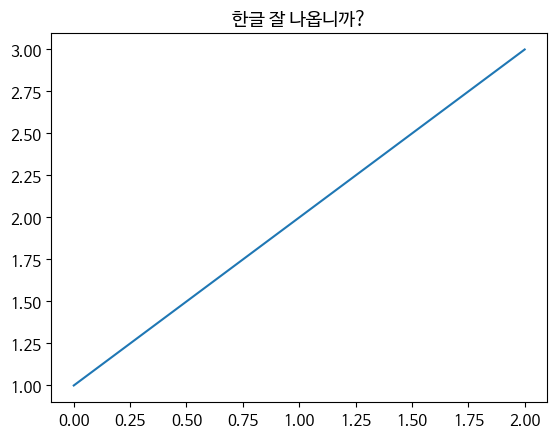

In [13]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Colab과 드라이브 연동

In [14]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 라이브러리 불러오기

In [15]:
import requests
import bs4

print(requests.__version__)
print(bs4.__version__)

2.32.3
4.12.3


In [30]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

company_code = '139130' # 삼성전자
url ="https://finance.naver.com/item/sise_day.nhn?code=" + company_code

headers = {
         'referer' : 'https://finance.naver.com/item/sise.naver?code=139130',
         'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
        }

def crawling(soup):
    last_page = int(soup.select_one('td.pgRR').a['href'].split('=')[-1])
    # print(last_page)

    df = None
    count = 0
    for page in range(1, last_page + 1):
      req = requests.get(f'{url}&page={page}', headers=headers)
      df = pd.concat([df, pd.read_html(req.text, encoding = "euc-kr")[0]], ignore_index=True)
      if count > 10:
        break
      count += 1

    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

def main():
    company_code = '139130' # 삼성전자
    url ="https://finance.naver.com/item/sise_day.nhn?code=" + company_code

    headers = {
             'referer' : 'https://finance.naver.com/item/sise.naver?code=139130',
             'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
            }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    result = crawling(soup)
    print(result)

if __name__ == "__main__":
    main()

             날짜      종가      전일비      시가      고가      저가       거래량
0    2024.10.10  8140.0   상승  80  8130.0  8220.0  8080.0  476689.0
1    2024.10.08  8060.0  하락  130  8180.0  8180.0  8060.0  448627.0
2    2024.10.07  8190.0  상승  120  8080.0  8250.0  8010.0  449215.0
3    2024.10.04  8070.0   하락  20  8130.0  8130.0  8010.0  230492.0
4    2024.10.02  8090.0      보합0  8090.0  8150.0  8000.0  456282.0
..          ...     ...      ...     ...     ...     ...       ...
115  2024.04.17  8140.0      보합0  8170.0  8210.0  8070.0  315207.0
116  2024.04.16  8140.0   하락  10  8150.0  8220.0  8060.0  387470.0
117  2024.04.15  8150.0  상승  100  8030.0  8150.0  8010.0  362279.0
118  2024.04.12  8050.0   하락  90  8070.0  8130.0  8000.0  574946.0
119  2024.04.11  8140.0  하락  170  8160.0  8230.0  8060.0  628447.0

[120 rows x 7 columns]


# html 파일 실행

In [28]:
import requests
import bs4
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

# print(requests.__version__)
# print(bs4.__version__)

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/dataset/'
with open(DATA_PATH + 'index.html', 'r', encoding='UTF8') as f:
    contents = f.read() # index 파일 읽는 코드
    # print(contents, type(contents))

    soup = BeautifulSoup(contents, 'lxml') # 형변환
    # print(soup, type(soup))

    # print(soup.h2, type(soup.h2))
    # print(soup.h2.text)

    # print(soup.ul)
    # print(soup.ul.li)

    print(soup.find_all('li'))

    companies = []
    for tag in soup.find_all('li'):
        companies.append(tag.text)
    print(companies[-1])


[<li>애플</li>, <li>삼성</li>, <li>노키아</li>, <li>LG</li>]
LG
